### Name:Sruthi.S

### RollNo:AM.EN.U4CSE19354

# **Credit Card Fraud Detection**






In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Importing Packages**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.utils import resample
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report
from sklearn.tree import DecisionTreeClassifier


## **Loading the Dataset**

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Credit Card Fraud/credit_dataset.csv')
dataset = data.copy()
dataset.head()

,Unnamed: 0,ID,GENDER,CAR,REALITY,NO_OF_CHILD,INCOME,INCOME_TYPE,EDUCATION_TYPE,FAMILY_TYPE,HOUSE_TYPE,FLAG_MOBIL,WORK_PHONE,PHONE,E_MAIL,FAMILY SIZE,BEGIN_MONTH,AGE,YEARS_EMPLOYED,TARGET
0,0,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,1,0,0,0,2.0,29,59,3,0
1,1,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1.0,4,52,8,0
2,2,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1.0,26,52,8,0
3,3,5008810,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1.0,26,52,8,0
4,4,5008811,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1.0,38,52,8,0


## **Summarization**

In [ ]:
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25134 entries, 0 to 25133
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      25134 non-null  int64  
 1   ID              25134 non-null  int64  
 2   GENDER          25134 non-null  object 
 3   CAR             25134 non-null  object 
 4   REALITY         25134 non-null  object 
 5   NO_OF_CHILD     25134 non-null  int64  
 6   INCOME          25134 non-null  float64
 7   INCOME_TYPE     25134 non-null  object 
 8   EDUCATION_TYPE  25134 non-null  object 
 9   FAMILY_TYPE     25134 non-null  object 
 10  HOUSE_TYPE      25134 non-null  object 
 11  FLAG_MOBIL      25134 non-null  int64  
 12  WORK_PHONE      25134 non-null  int64  
 13  PHONE           25134 non-null  int64  
 14  E_MAIL          25134 non-null  int64  
 15  FAMILY SIZE     25134 non-null  float64
 16  BEGIN_MONTH     25134 non-null  int64  
 17  AGE             25134 non-null 

In [ ]:
print("Rows    :",dataset.shape[0])
print("Columns :",dataset.shape[1])

Rows    : 25134
Columns : 20


In [ ]:
print(dataset.shape)
print(dataset.columns)

(25134, 20)
Index(['Unnamed: 0', 'ID', 'GENDER', 'CAR', 'REALITY', 'NO_OF_CHILD', 'INCOME',
       'INCOME_TYPE', 'EDUCATION_TYPE', 'FAMILY_TYPE', 'HOUSE_TYPE',
       'FLAG_MOBIL', 'WORK_PHONE', 'PHONE', 'E_MAIL', 'FAMILY SIZE',
       'BEGIN_MONTH', 'AGE', 'YEARS_EMPLOYED', 'TARGET'],
      dtype='object')


In [ ]:
dataset.dtypes

Unnamed: 0          int64
ID                  int64
GENDER             object
CAR                object
REALITY            object
NO_OF_CHILD         int64
INCOME            float64
INCOME_TYPE        object
EDUCATION_TYPE     object
FAMILY_TYPE        object
HOUSE_TYPE         object
FLAG_MOBIL          int64
WORK_PHONE          int64
PHONE               int64
E_MAIL              int64
FAMILY SIZE       float64
BEGIN_MONTH         int64
AGE                 int64
YEARS_EMPLOYED      int64
TARGET              int64
dtype: object

In [ ]:
#checking for NULL VALUES in dataset
dataset.isna().sum()

Unnamed: 0        0
ID                0
GENDER            0
CAR               0
REALITY           0
NO_OF_CHILD       0
INCOME            0
INCOME_TYPE       0
EDUCATION_TYPE    0
FAMILY_TYPE       0
HOUSE_TYPE        0
FLAG_MOBIL        0
WORK_PHONE        0
PHONE             0
E_MAIL            0
FAMILY SIZE       0
BEGIN_MONTH       0
AGE               0
YEARS_EMPLOYED    0
TARGET            0
dtype: int64

In [ ]:
#checking for unique values in dataset
dataset.nunique()

Unnamed: 0        25134
ID                25134
GENDER                2
CAR                   2
REALITY               2
NO_OF_CHILD           9
INCOME              195
INCOME_TYPE           5
EDUCATION_TYPE        5
FAMILY_TYPE           5
HOUSE_TYPE            6
FLAG_MOBIL            1
WORK_PHONE            2
PHONE                 2
E_MAIL                2
FAMILY SIZE          10
BEGIN_MONTH          61
AGE                  47
YEARS_EMPLOYED       43
TARGET                2
dtype: int64

In [ ]:
dataset.head()

,ID,GENDER,CAR,REALITY,NO_OF_CHILD,INCOME,INCOME_TYPE,EDUCATION_TYPE,FAMILY_TYPE,HOUSE_TYPE,WORK_PHONE,PHONE,E_MAIL,FAMILY SIZE,BEGIN_MONTH,AGE,YEARS_EMPLOYED,TARGET
0,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,0,0,0,2.0,29,59,3,0
1,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,0,1,1,1.0,4,52,8,0
2,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,0,1,1,1.0,26,52,8,0
3,5008810,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,0,1,1,1.0,26,52,8,0
4,5008811,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,0,1,1,1.0,38,52,8,0


0    0.98321
1    0.01679
Name: TARGET, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


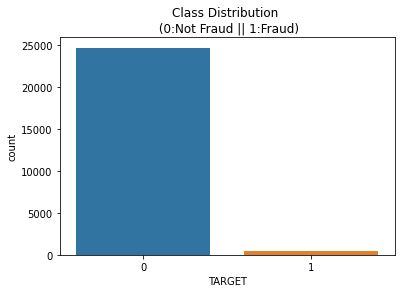

In [ ]:
# TARGET column
sns.countplot(dataset.TARGET).set_title("Class Distribution \n (0:Not Fraud || 1:Fraud)")
print(dataset.TARGET.value_counts(normalize=True))
plt.show()

In [ ]:
print('Not Frauds :', round(dataset['TARGET'].value_counts()[0]/len(dataset) * 100,2), '% of the dataset')
print('Frauds :', round(dataset['TARGET'].value_counts()[1]/len(dataset) * 100,2), '% of the dataset')

Not Frauds : 98.32 % of the dataset
Frauds : 1.68 % of the dataset


In [ ]:
dataset.describe()

,ID,NO_OF_CHILD,INCOME,WORK_PHONE,PHONE,E_MAIL,FAMILY SIZE,BEGIN_MONTH,AGE,YEARS_EMPLOYED,TARGET
count,2.513400e+04,25134.000000,2.513400e+04,25134.000000,25134.000000,25134.000000,25134.000000,25134.000000,25134.000000,25134.000000,25134.000000
mean,5.078838e+06,0.512334,1.948339e+05,0.273812,0.292791,0.100660,2.294064,26.120594,40.536166,7.204106,0.016790
std,4.194102e+04,0.787785,1.045110e+05,0.445923,0.455052,0.300885,0.947590,16.439658,9.559474,6.414231,0.128486
min,5.008806e+06,0.000000,2.700000e+04,0.000000,0.000000,0.000000,1.000000,0.000000,21.000000,0.000000,0.000000
25%,5.042228e+06,0.000000,1.350000e+05,0.000000,0.000000,0.000000,2.000000,12.000000,33.000000,3.000000,0.000000
50%,5.079004e+06,0.000000,1.800000e+05,0.000000,0.000000,0.000000,2.000000,24.000000,40.000000,5.000000,0.000000
75%,5.115604e+06,1.000000,2.250000e+05,1.000000,1.000000,0.000000,3.000000,39.000000,48.000000,10.000000,0.000000
max,5.150487e+06,19.000000,1.575000e+06,1.000000,1.000000,1.000000,20.000000,60.000000,67.000000,43.000000,1.000000


In [ ]:
dataset.describe(include="O")

,GENDER,CAR,REALITY,INCOME_TYPE,EDUCATION_TYPE,FAMILY_TYPE,HOUSE_TYPE
count,25134,25134,25134,25134,25134,25134,25134
unique,2,2,2,5,5,5,6
top,F,N,Y,Working,Secondary / secondary special,Married,House / apartment
freq,15630,14618,16461,15622,16808,17509,22102


In [ ]:
#all the categorical columns with their values -
cols=dataset.describe(include="O").columns
for i in cols:
    print("Distinct_values :\n 'column_name' =",i)
    print(dataset[i].unique())
    print("")

Distinct_values :
 'column_name' = GENDER
['M' 'F']

Distinct_values :
 'column_name' = CAR
['Y' 'N']

Distinct_values :
 'column_name' = REALITY
['Y' 'N']

Distinct_values :
 'column_name' = INCOME_TYPE
['Working' 'Commercial associate' 'State servant' 'Student' 'Pensioner']

Distinct_values :
 'column_name' = EDUCATION_TYPE
['Secondary / secondary special' 'Higher education' 'Incomplete higher'
 'Lower secondary' 'Academic degree']

Distinct_values :
 'column_name' = FAMILY_TYPE
['Married' 'Single / not married' 'Civil marriage' 'Separated' 'Widow']

Distinct_values :
 'column_name' = HOUSE_TYPE
['House / apartment' 'Rented apartment' 'Municipal apartment'
 'With parents' 'Co-op apartment' 'Office apartment']



## **Visualization**

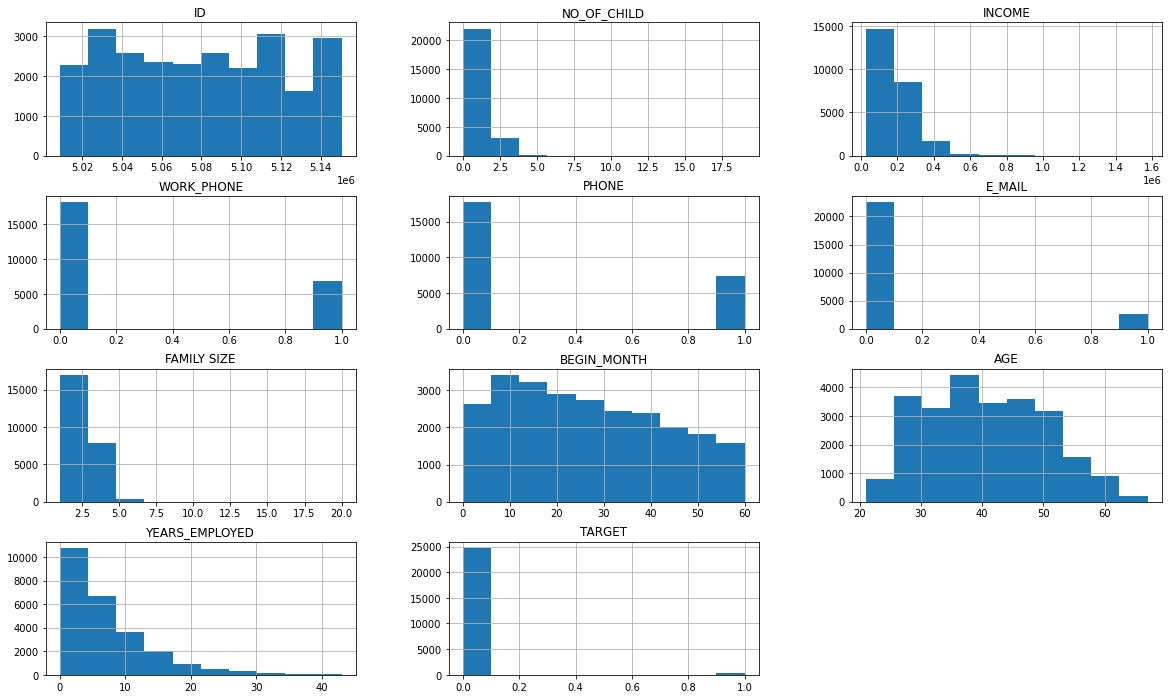

In [ ]:
#Distribution of continuous 
dataset.hist(figsize=(20,12))
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


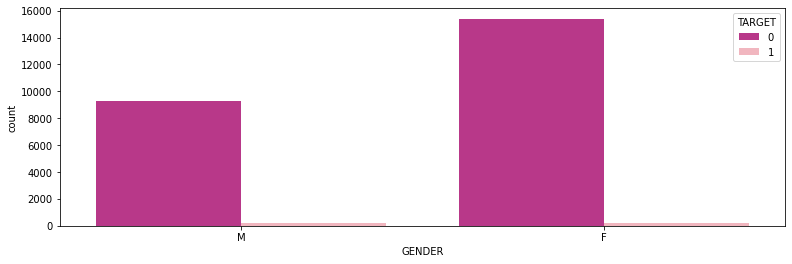

In [ ]:
plt.figure(figsize=(13,4))
sns.countplot(dataset["GENDER"],hue="TARGET",data=dataset,palette="RdPu_r")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


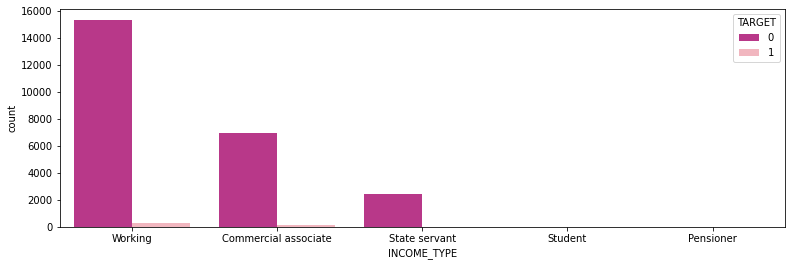

In [ ]:
plt.figure(figsize=(13,4))
sns.countplot(dataset["INCOME_TYPE"],hue="TARGET",data=dataset,palette="RdPu_r")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


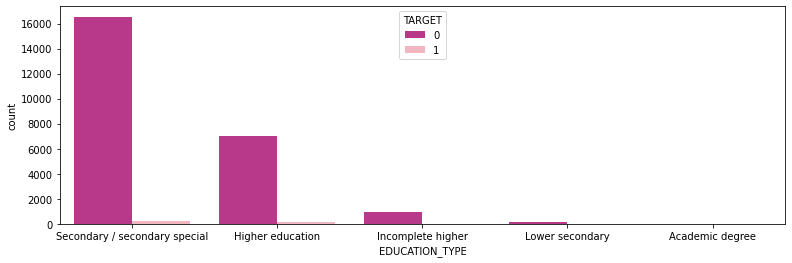

In [ ]:
plt.figure(figsize=(13,4))
sns.countplot(dataset["EDUCATION_TYPE"],hue="TARGET",data=dataset,palette="RdPu_r")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


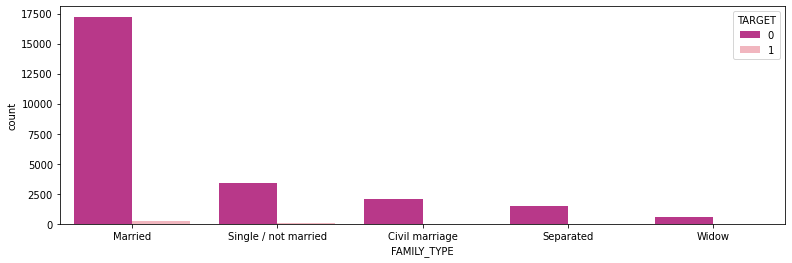

In [ ]:
plt.figure(figsize=(13,4))
sns.countplot(dataset["FAMILY_TYPE"],hue="TARGET",data=dataset,palette="RdPu_r")
plt.show()

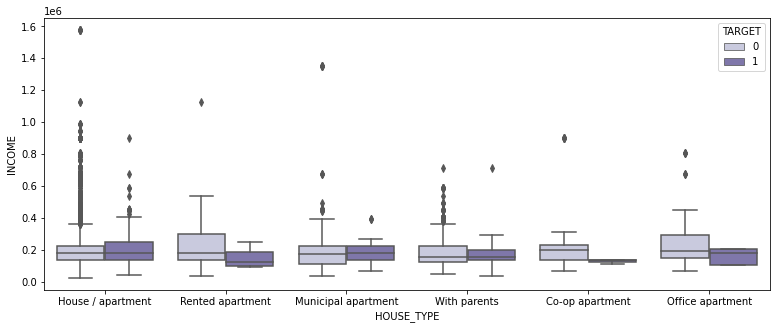

In [ ]:
plt.figure(figsize=(13,5))
sns.boxplot(x="HOUSE_TYPE",y="INCOME",data=dataset,hue="TARGET",palette="Purples")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


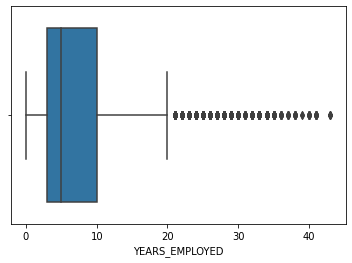

In [ ]:
sns.boxplot(dataset["YEARS_EMPLOYED"])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


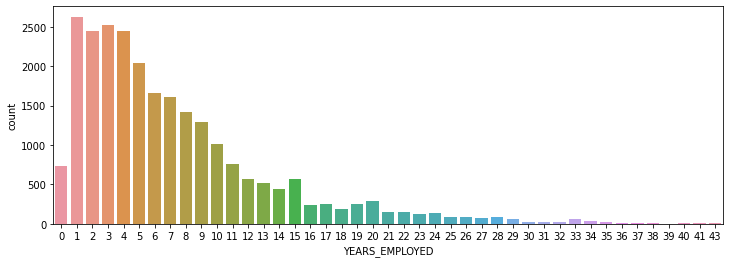

In [ ]:
plt.figure(figsize=(12,4))
sns.countplot(dataset["YEARS_EMPLOYED"])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


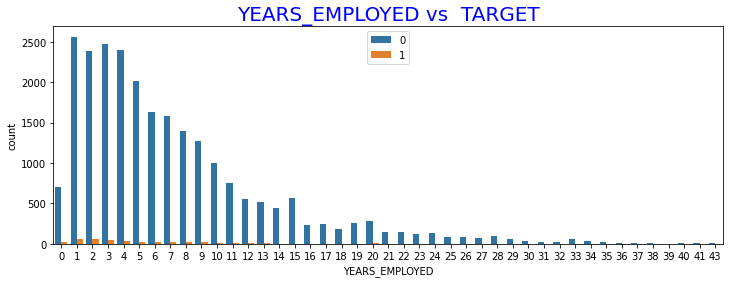

In [ ]:
plt.figure(figsize=(12,4))
sns.countplot(dataset["YEARS_EMPLOYED"],hue="TARGET",data=dataset)
plt.title("YEARS_EMPLOYED vs  TARGET",fontsize=20,color="BLUE")
plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


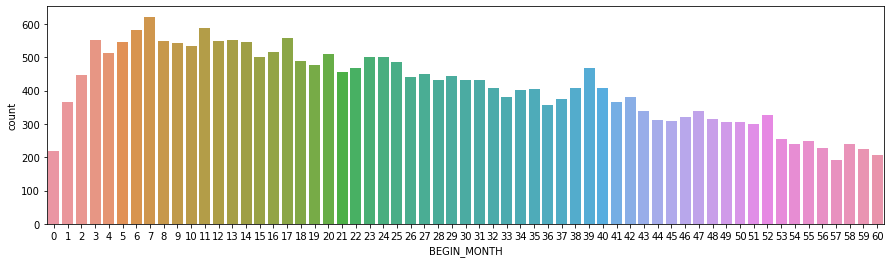

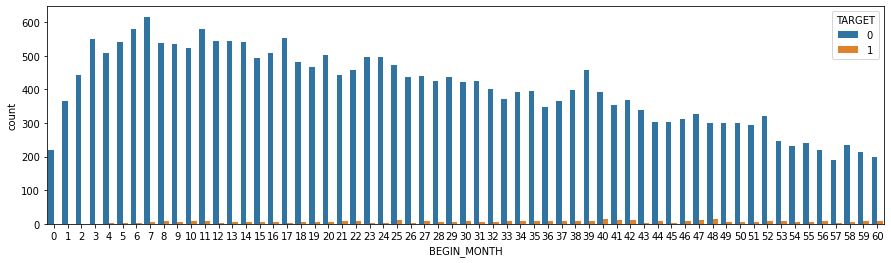

In [ ]:
#checking the frequency of BEGIN_MONTH
plt.figure(figsize=(15,4))
sns.countplot(dataset["BEGIN_MONTH"])
plt.figure(figsize=(15,4))
sns.countplot(dataset["BEGIN_MONTH"],hue="TARGET",data=dataset)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


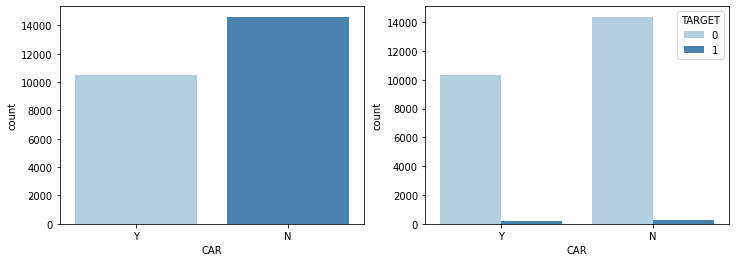

In [ ]:
plt.figure(figsize=(12,4))
plt.subplot(121)
sns.countplot(dataset["CAR"],palette="Blues")
plt.subplot(122)
sns.countplot(dataset.CAR,hue="TARGET",data=dataset,palette="Blues")
plt.show()

In [ ]:
#these columns have continuous values other are having discrete entries
cont=dataset[["INCOME","BEGIN_MONTH","AGE","YEARS_EMPLOYED"]]

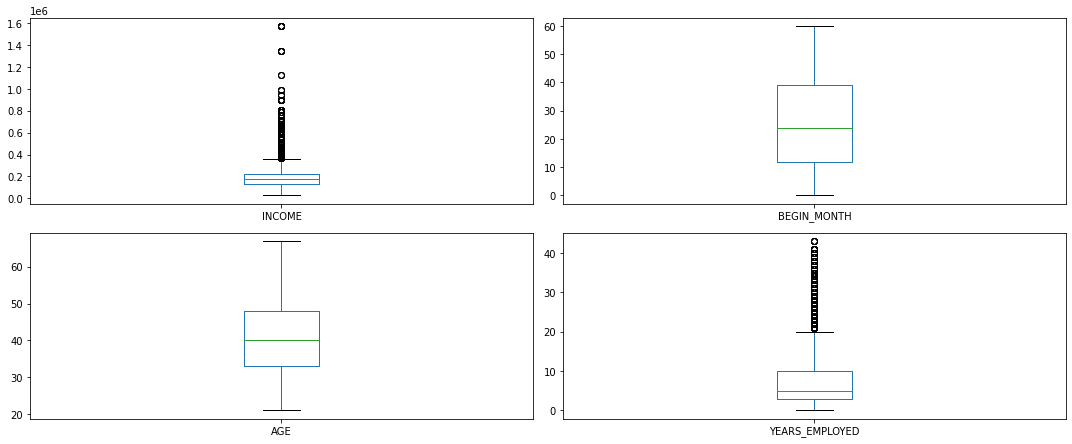

In [ ]:
#Using Boxplot to detect the outliers-
plt.figure(figsize=(15,12))

for i ,col in enumerate(list(cont.columns)):
    plt.subplot(4,2,i+1)
    cont.boxplot(col)
    plt.grid()
    plt.tight_layout()

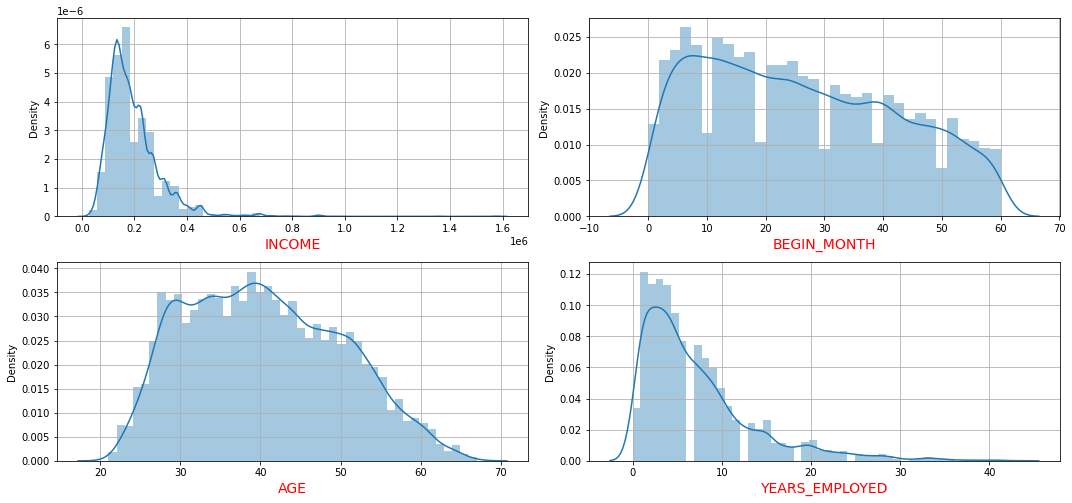

In [ ]:
# Distribution of columns those have continuous -
#Histogram
plt.figure(figsize=(15,10))

for i ,cols in enumerate(list(cont.columns)):
    plt.subplot(3,2,i+1)
    sns.distplot(cont[cols])
    plt.xlabel(cols,fontsize=14,color="Red")
    plt.grid()
    plt.tight_layout()


## **Pre-Processing The Data**

In [ ]:
#Flag_mobil columns is of no use as it has only one value
dataset.drop(columns=['Unnamed: 0','FLAG_MOBIL'],inplace=True)

In [ ]:
#removing values those are greater then 600000
dataset=dataset[dataset['INCOME'] < 600000]

In [ ]:
#Dropping the values greater the 20
dataset=dataset[dataset['YEARS_EMPLOYED'] < 20]

In [ ]:
dataset.drop(columns={"ID"},inplace=True,axis=1)

In [ ]:
#converting float data types to INT64 datatype
floats=["INCOME","FAMILY SIZE","BEGIN_MONTH"]

for i in floats:
    dataset[i]=dataset[i].astype("int64")

In [ ]:
labels=["GENDER","CAR","REALITY","INCOME_TYPE","EDUCATION_TYPE","HOUSE_TYPE","FAMILY_TYPE"]
label=LabelEncoder()

for i in labels:
    dataset[i]=label.fit_transform(dataset[i])

In [ ]:
#dataset after using LabelEncoder
dataset.head()

,GENDER,CAR,REALITY,NO_OF_CHILD,INCOME,INCOME_TYPE,EDUCATION_TYPE,FAMILY_TYPE,HOUSE_TYPE,WORK_PHONE,PHONE,E_MAIL,FAMILY SIZE,BEGIN_MONTH,AGE,YEARS_EMPLOYED,TARGET
0,1,1,1,0,112500,4,4,1,1,0,0,0,2,29,59,3,0
1,0,0,1,0,270000,0,4,3,1,0,1,1,1,4,52,8,0
2,0,0,1,0,270000,0,4,3,1,0,1,1,1,26,52,8,0
3,0,0,1,0,270000,0,4,3,1,0,1,1,1,26,52,8,0
4,0,0,1,0,270000,0,4,3,1,0,1,1,1,38,52,8,0


In [ ]:
#corr of the 
dataset.corr()

,GENDER,CAR,REALITY,NO_OF_CHILD,INCOME,INCOME_TYPE,EDUCATION_TYPE,FAMILY_TYPE,HOUSE_TYPE,WORK_PHONE,PHONE,E_MAIL,FAMILY SIZE,BEGIN_MONTH,AGE,YEARS_EMPLOYED,TARGET
GENDER,1.000000,0.335480,-0.038093,0.007133,0.215555,0.054693,0.049496,-0.048857,0.050642,0.016151,-0.022394,-0.029970,0.033294,-0.004875,-0.088454,-0.074834,0.018699
CAR,0.335480,1.000000,0.010930,0.060831,0.213636,0.001591,-0.072167,-0.098587,0.005645,-0.024479,-0.025668,0.001649,0.104713,0.026117,-0.052365,-0.002096,-0.003231
REALITY,-0.038093,0.010930,1.000000,0.021140,0.030626,-0.029387,0.008892,0.001889,-0.176601,-0.207793,-0.060026,0.062439,0.021296,-0.011152,0.089129,-0.008422,-0.022924
NO_OF_CHILD,0.007133,0.060831,0.021140,1.000000,-0.034394,0.041044,-0.024205,-0.161934,0.004803,-0.000719,-0.013026,-0.016472,0.905458,0.006449,-0.238263,0.015776,-0.003085
INCOME,0.215555,0.213636,0.030626,-0.034394,1.000000,-0.151565,-0.201597,0.036170,-0.007361,-0.098489,0.006639,0.068385,-0.045235,0.031696,0.053488,0.044452,0.011164
INCOME_TYPE,0.054693,0.001591,-0.029387,0.041044,-0.151565,1.000000,0.105883,-0.012714,-0.008985,0.079314,0.002694,-0.042644,0.043303,-0.005473,0.001142,0.024137,-0.001414
EDUCATION_TYPE,0.049496,-0.072167,0.008892,-0.024205,-0.201597,0.105883,1.000000,-0.001881,-0.029707,0.007729,-0.054091,-0.105592,-0.019444,-0.013024,0.144156,0.020961,-0.010094
FAMILY_TYPE,-0.048857,-0.098587,0.001889,-0.161934,0.036170,-0.012714,-0.001881,1.000000,0.040743,-0.048622,-0.026204,-0.013375,-0.520295,-0.042932,0.011540,-0.033102,0.022860
HOUSE_TYPE,0.050642,0.005645,-0.176601,0.004803,-0.007361,-0.008985,-0.029707,0.040743,1.000000,0.002463,-0.024382,-0.007611,-0.018643,-0.028966,-0.181886,-0.056428,0.001291
WORK_PHONE,0.016151,-0.024479,-0.207793,-0.000719,-0.098489,0.079314,0.007729,-0.048622,0.002463,1.000000,0.364953,-0.064787,0.016321,0.013210,-0.045377,0.012513,0.007058


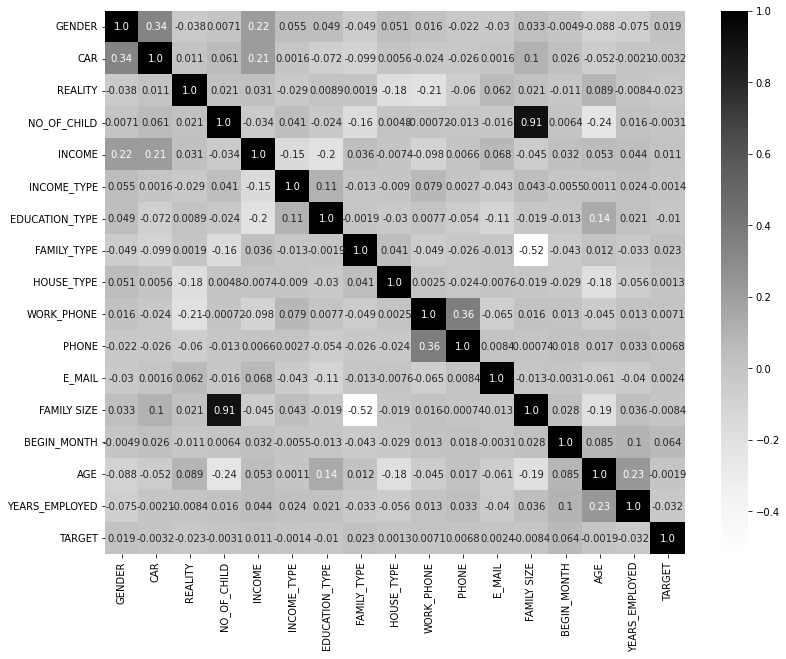

In [ ]:
plt.figure(figsize=(13,10))
sns.heatmap(dataset.corr(),annot=True,fmt='.2',cmap="Greys")
plt.show()

In [ ]:
#FAMILY_SIZE and NO_OF_CHILD are highly correlated to each other so we can drop one feature form the dataset
dataset.drop('NO_OF_CHILD',inplace=True,axis=1)

In [ ]:
dataset.head()

,GENDER,CAR,REALITY,INCOME,INCOME_TYPE,EDUCATION_TYPE,FAMILY_TYPE,HOUSE_TYPE,WORK_PHONE,PHONE,E_MAIL,FAMILY SIZE,BEGIN_MONTH,AGE,YEARS_EMPLOYED,TARGET
0,1,1,1,112500,4,4,1,1,0,0,0,2,29,59,3,0
1,0,0,1,270000,0,4,3,1,0,1,1,1,4,52,8,0
2,0,0,1,270000,0,4,3,1,0,1,1,1,26,52,8,0
3,0,0,1,270000,0,4,3,1,0,1,1,1,26,52,8,0
4,0,0,1,270000,0,4,3,1,0,1,1,1,38,52,8,0


In [ ]:
dataset.to_csv(r'/content/drive/MyDrive/Colab Notebooks/Credit Card Fraud\cleaned_data.csv', index = False)


In [ ]:
new_data=dataset[["GENDER","BEGIN_MONTH","AGE","INCOME","YEARS_EMPLOYED","FAMILY SIZE","INCOME_TYPE","FAMILY_TYPE","WORK_PHONE"
                  ,"PHONE","HOUSE_TYPE","EDUCATION_TYPE","TARGET"]]

In [ ]:
new_data.shape

(23361, 13)

In [ ]:
new_data.head()

,GENDER,BEGIN_MONTH,AGE,INCOME,YEARS_EMPLOYED,FAMILY SIZE,INCOME_TYPE,FAMILY_TYPE,WORK_PHONE,PHONE,HOUSE_TYPE,EDUCATION_TYPE,TARGET
0,1,29,59,112500,3,2,4,1,0,0,1,4,0
1,0,4,52,270000,8,1,0,3,0,1,1,4,0
2,0,26,52,270000,8,1,0,3,0,1,1,4,0
3,0,26,52,270000,8,1,0,3,0,1,1,4,0
4,0,38,52,270000,8,1,0,3,0,1,1,4,0


In [ ]:
dummy_data=pd.get_dummies(new_data,columns={"GENDER","FAMILY SIZE","INCOME_TYPE","FAMILY_TYPE","WORK_PHONE","PHONE",
                                            "HOUSE_TYPE","EDUCATION_TYPE"},drop_first=True)
dummy_data.shape
  

(23361, 34)

In [ ]:
data=dummy_data.copy()

In [ ]:
data_minority=data[dataset["TARGET"] == 1]
data_majority=data[dataset["TARGET"] == 0]

In [ ]:
print("Data_majority :",data_majority.shape)
print("Data_minority :",data_minority.shape)

Data_majority : (22957, 34)
Data_minority : (404, 34)


In [ ]:
data_oversampled=data.copy()

In [ ]:
data_oversampled.TARGET.value_counts()

0    22957
1      404
Name: TARGET, dtype: int64

In [ ]:
#setting TARGET variable SMOTE
X=data_oversampled.drop("TARGET",axis=1)
y=data_oversampled.TARGET

In [ ]:
X_smote,y_smote=SMOTE().fit_sample(X,y)
#shape of dataset after using SMOTE
print("X",X_smote.shape)
print("y",y_smote.shape)

X (45914, 33)
y (45914,)


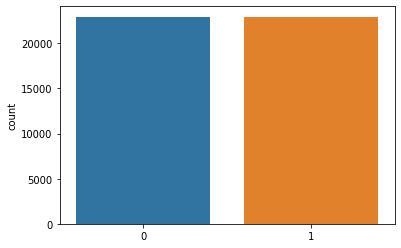

In [ ]:
sns.countplot(y_smote)
plt.show()

### **Splitting the dataset into training and testing**

In [ ]:
X_train_over,X_test_over,y_train_over,y_test_over=train_test_split(X_smote,y_smote,test_size=0.25,random_state=99)

In [ ]:
print("X_train_over : ",X_train_over.shape,"\ny_train_over : ",y_train_over.shape)
print("X_train_over : ",X_test_over.shape,"\ny_train_over : ",y_test_over.shape)

X_train_over :  (34435, 33) 
y_train_over :  (34435,)
X_train_over :  (11479, 33) 
y_train_over :  (11479,)


## **1.Decision Tree Algorithm Using Sklearn-Package**



*   Gini index:

  image.png

Gini Index is a metric to measure how often a randomly chosen element would be 
incorrectly identified.

Sklearn supports “gini” criteria for Gini Index and by default, it takes “gini” value.



In [ ]:
tree=DecisionTreeClassifier()
tree.fit(X_train_over,y_train_over)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

### **Classification Metrics**

In [ ]:
pred_tree=tree.predict(X_test_over)
print(metrics.classification_report(y_test_over,pred_tree))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      5705
           1       0.97      0.99      0.98      5774

    accuracy                           0.98     11479
   macro avg       0.98      0.98      0.98     11479
weighted avg       0.98      0.98      0.98     11479



### **Confusion Matrix**

98.71839279528922
97.25302849343116
97.95278334349682


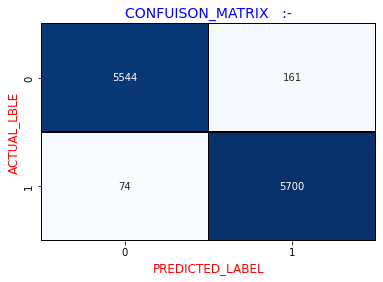

In [ ]:

print(metrics.precision_score(pred_tree,y_test_over)*100)
print(metrics.recall_score(pred_tree,y_test_over)*100)
print(metrics.accuracy_score(pred_tree,y_test_over)*100)
sns.heatmap(metrics.confusion_matrix(y_test_over,pred_tree),annot=True,cbar=False
            ,cmap="Blues",fmt="1",linecolor="Black",linewidth=0.3)
plt.xlabel("PREDICTED_LABEL",fontsize=12,color='r')
plt.ylabel("ACTUAL_LBLE",fontsize=12,color='r')
plt.title("CONFUISON_MATRIX   :-",fontsize=14,color="b")
plt.show()



*  Entropy
        
        Entropy is the measure of uncertainty of a random variable, it characterizes the impurity of an arbitrary collection of examples. The higher the entropy the more the information content.

        Sklearn supports “entropy” criteria for Information Gain and if we want to use Information Gain method in sklearn then we have to mention it explicitly



              precision    recall  f1-score   support

           0       0.73      0.86      0.79      5705
           1       0.83      0.68      0.75      5774

    accuracy                           0.77     11479
   macro avg       0.78      0.77      0.77     11479
weighted avg       0.78      0.77      0.77     11479

68.16764807758919
82.77602523659307
76.85338444115341


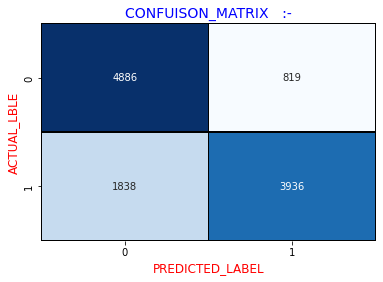

In [ ]:
clf_entropy = DecisionTreeClassifier(
            criterion = "entropy", random_state = 100,
            max_depth = 3, min_samples_leaf = 5)
  
    # Performing training
clf_entropy.fit(X_train_over, y_train_over)
entropy_pred_tree=clf_entropy.predict(X_test_over)
print(metrics.classification_report(y_test_over,entropy_pred_tree))
print(metrics.precision_score(entropy_pred_tree,y_test_over)*100)
print(metrics.recall_score(entropy_pred_tree,y_test_over)*100)
print(metrics.accuracy_score(entropy_pred_tree,y_test_over)*100)
sns.heatmap(metrics.confusion_matrix(y_test_over,entropy_pred_tree),annot=True,cbar=False
            ,cmap="Blues",fmt="1",linecolor="Black",linewidth=0.3)
plt.xlabel("PREDICTED_LABEL",fontsize=12,color='r')
plt.ylabel("ACTUAL_LBLE",fontsize=12,color='r')
plt.title("CONFUISON_MATRIX   :-",fontsize=14,color="b")
plt.show()

### **Evaluating Testing and Training Accuracy by plotting the graph Using Gini Index**

>1, train: 0.625, test: 0.619,loss: 0.006
>2, train: 0.680, test: 0.675,loss: 0.005
>3, train: 0.771, test: 0.770,loss: 0.001
>4, train: 0.800, test: 0.796,loss: 0.004
>5, train: 0.850, test: 0.847,loss: 0.004
>6, train: 0.864, test: 0.858,loss: 0.006
>7, train: 0.891, test: 0.883,loss: 0.008
>8, train: 0.911, test: 0.902,loss: 0.009
>9, train: 0.935, test: 0.926,loss: 0.009
>10, train: 0.947, test: 0.933,loss: 0.014
>11, train: 0.955, test: 0.942,loss: 0.013
>12, train: 0.966, test: 0.952,loss: 0.014
>13, train: 0.974, test: 0.961,loss: 0.013
>14, train: 0.982, test: 0.968,loss: 0.014
>15, train: 0.986, test: 0.971,loss: 0.015
>16, train: 0.990, test: 0.972,loss: 0.018
>17, train: 0.992, test: 0.974,loss: 0.018
>18, train: 0.994, test: 0.976,loss: 0.018
>19, train: 0.996, test: 0.978,loss: 0.018
>20, train: 0.997, test: 0.978,loss: 0.018


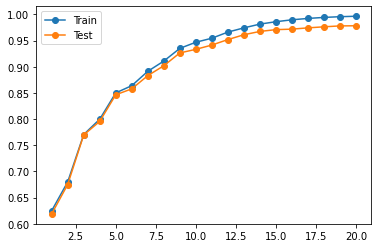

In [ ]:
# evaluate decision tree performance on train and test sets with different tree depths
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot
# create dataset
train_scores, test_scores = list(), list()
# define the tree depths to evaluate
values = [i for i in range(1, 21)]
# evaluate a decision tree for each depth
for i in values:
	# configure the model
	model = DecisionTreeClassifier(max_depth=i)
	# fit model on the training dataset
	model.fit(X_train_over, y_train_over)
	# evaluate on the train dataset
	train_yhat = model.predict(X_train_over)
	train_acc = accuracy_score(y_train_over, train_yhat)
	train_scores.append(train_acc)
	# evaluate on the test dataset
	test_yhat = model.predict(X_test_over)
	test_acc = accuracy_score(y_test_over, test_yhat)
	test_scores.append(test_acc)
	# summarize progress
	print('>%d, train: %.3f, test: %.3f, loss: %.3f' % (i, train_acc, test_acc,train_acc-test_acc))
# plot of train and test scores vs tree depth
pyplot.plot(values, train_scores, '-o', label='Train')
pyplot.plot(values, test_scores, '-o', label='Test')
pyplot.legend()
pyplot.show()

### **Finding the Optimal Value for max-depth**

<Figure size 432x288 with 0 Axes>

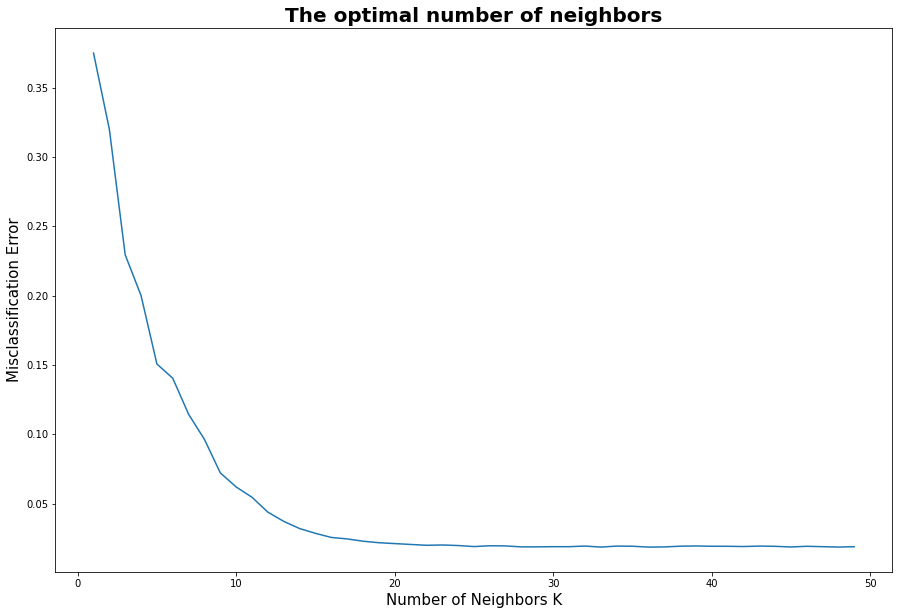

In [ ]:
from sklearn.model_selection import cross_val_score
depth_list = list(range(1,50,1))
# creating list of cv scores
cv_scores = []

# perform 10-fold cross validation
for k in depth_list:
    tree = DecisionTreeClassifier(max_depth=k)
    scores = cross_val_score(tree, X_train_over, y_train_over, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())
# changing to misclassification error
MSE = [1 - x for x in cv_scores]

plt.figure()
plt.figure(figsize=(15,10))
plt.title('The optimal number of neighbors', fontsize=20, fontweight='bold')
plt.xlabel('Number of Neighbors K', fontsize=15)
plt.ylabel('Misclassification Error', fontsize=15)
sns.set_style("whitegrid")
plt.plot(depth_list, MSE)

plt.show()

In [ ]:
best_depth = depth_list[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d." % best_depth)

The optimal number of neighbors is 33.


## **2.Native Bayes Using Sklearn-Package**



In [ ]:
# load the iris dataset
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train_over, y_train_over)

# making predictions on the testing set
y_pred = gnb.predict(X_test_over)

# comparing actual response values (y_test) with predicted response values (y_pred)
from sklearn import metrics
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test_over, y_pred)*100)


Gaussian Naive Bayes model accuracy(in %): 65.09277811656068


### **Evaluating Native Bayes Using Confusion Matrix**

              precision    recall  f1-score   support

           0       0.69      0.55      0.61      5705
           1       0.63      0.75      0.68      5774

    accuracy                           0.65     11479
   macro avg       0.66      0.65      0.65     11479
weighted avg       0.66      0.65      0.65     11479

74.97402147558019
62.821070962124516
65.09277811656068


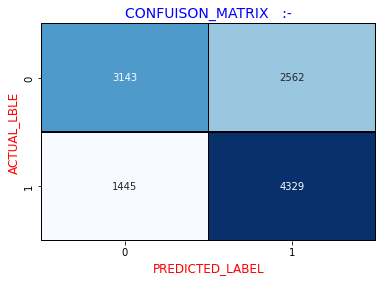

In [ ]:
pred_=gnb.predict(X_test_over)
print(metrics.classification_report(y_test_over,pred_))

print(metrics.precision_score(pred_,y_test_over)*100)
print(metrics.recall_score(pred_,y_test_over)*100)
print(metrics.accuracy_score(pred_,y_test_over)*100)
sns.heatmap(metrics.confusion_matrix(y_test_over,pred_),annot=True,cbar=False
            ,cmap="Blues",fmt="1",linecolor="Black",linewidth=0.3)
plt.xlabel("PREDICTED_LABEL",fontsize=12,color='r')
plt.ylabel("ACTUAL_LBLE",fontsize=12,color='r')
plt.title("CONFUISON_MATRIX   :-",fontsize=14,color="b")
plt.show()


In [ ]:
y_pred_train = gnb.predict(X_train_over)

y_pred_train
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train_over, y_pred_train)))
print('Training set score: {:.4f}'.format(gnb.score(X_train_over, y_train_over)))

print('Test set score: {:.4f}'.format(gnb.score(X_test_over, y_test_over)))

Training-set accuracy score: 0.6518
Training set score: 0.6518
Test set score: 0.6509


## **3.Implementing KNN Algorithm From Scratch**

In [ ]:
# Importing libraries

import pandas as pd

import numpy as np

from sklearn.model_selection import train_test_split

from scipy.stats import mode

from sklearn.neighbors import KNeighborsClassifier

# K Nearest Neighbors Classification

class K_Nearest_Neighbors_Classifier() :
	
	def __init__( self, K ) :
		
		self.K = K
		
	# Function to store training set
		
	def fit( self, X_train, Y_train ) :
		
		self.X_train = X_train
		
		self.Y_train = Y_train
		
		# no_of_training_examples, no_of_features
		
		self.m, self.n = X_train.shape
	
	# Function for prediction
		
	def predict( self, X_test ) :
		
		self.X_test = X_test
		
		# no_of_test_examples, no_of_features
		
		self.m_test, self.n = X_test.shape
		
		# initialize Y_predict
		
		Y_predict = np.zeros( self.m_test )
		
		for i in range( self.m_test ) :
			
			x = self.X_test[i]
			
			# find the K nearest neighbors from current test example
			
			neighbors = np.zeros( self.K )
			
			neighbors = self.find_neighbors( x )
			
			# most frequent class in K neighbors
			
			Y_predict[i] = mode( neighbors )[0][0]	
			
		return Y_predict
	
	# Function to find the K nearest neighbors to current test example
			
	def find_neighbors( self, x ) :
		
		# calculate all the euclidean distances between current
		# test example x and training set X_train
		
		euclidean_distances = np.zeros( self.m )
		
		for i in range( self.m ) :
			
			d = self.euclidean( x, self.X_train[i] )
			
			euclidean_distances[i] = d
		
		# sort Y_train according to euclidean_distance_array and
		# store into Y_train_sorted
		
		inds = euclidean_distances.argsort()
		
		Y_train_sorted = self.Y_train[inds]
		
		return Y_train_sorted[:self.K]
	
	# Function to calculate euclidean distance
			
	def euclidean( self, x, x_train ) :
		
		return np.sqrt( np.sum( np.square( x - x_train ) ) )

# Driver code

def main() :
	
	# Importing dataset
	
	
	
	# Splitting dataset into train and test set
	
	# Model training
	
	model = K_Nearest_Neighbors_Classifier( K = 3 )
	
	model.fit( X_train_over, y_train_over )
	
	model1 = KNeighborsClassifier( n_neighbors = 3 )
	
	model1.fit( X_train_over, y_train_over )
	
	# Prediction on test set

	Y_pred = model.predict( X_test_over )
	
	Y_pred1 = model1.predict( X_test_over )
	
	# measure performance
	
	correctly_classified = 0
	
	correctly_classified1 = 0
	
	# counter
	
	count = 0
	
	for count in range( np.size( Y_pred ) ) :
		
		if y_test_over[count] == Y_pred[count] :
			
			correctly_classified = correctly_classified + 1
		
		if y_test_over[count] == Y_pred1[count] :
			
			correctly_classified1 = correctly_classified1 + 1
			
		count = count + 1
		
	print( "Accuracy on test set by our model	 : ", (
	correctly_classified / count ) * 100 )
	print( "Accuracy on test set by sklearn model : ", (
	correctly_classified1 / count ) * 100 )
	
	
if __name__ == "__main__" :
	
	main()


Accuracy on test set by our model	 :  94.08485059674187
Accuracy on test set by sklearn model :  94.08485059674187


### **Evaluating KNN Performance On Train And Test Sets With Different Numbers Of Neighbors**

>1, train: 0.999, test: 0.966
>2, train: 0.998, test: 0.968
>3, train: 0.969, test: 0.941
>4, train: 0.972, test: 0.945
>5, train: 0.945, test: 0.920
>6, train: 0.949, test: 0.925
>7, train: 0.927, test: 0.905
>8, train: 0.932, test: 0.911
>9, train: 0.912, test: 0.892
>10, train: 0.917, test: 0.899
>11, train: 0.897, test: 0.881
>12, train: 0.903, test: 0.887
>13, train: 0.885, test: 0.874
>14, train: 0.891, test: 0.878
>15, train: 0.876, test: 0.865
>16, train: 0.882, test: 0.872
>17, train: 0.868, test: 0.859
>18, train: 0.872, test: 0.864
>19, train: 0.861, test: 0.854
>20, train: 0.865, test: 0.860
>21, train: 0.853, test: 0.848
>22, train: 0.856, test: 0.852
>23, train: 0.846, test: 0.841
>24, train: 0.850, test: 0.847
>25, train: 0.841, test: 0.837
>26, train: 0.844, test: 0.842
>27, train: 0.835, test: 0.832
>28, train: 0.839, test: 0.836
>29, train: 0.830, test: 0.825
>30, train: 0.833, test: 0.829
>31, train: 0.824, test: 0.822
>32, train: 0.829, test: 0.825
>33, train: 0.820

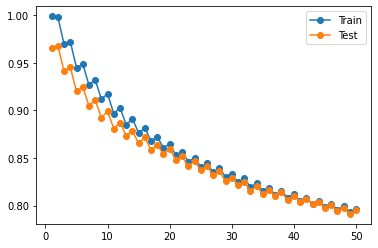

In [ ]:
# evaluate knn performance on train and test sets with different numbers of neighbors
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from matplotlib import pyplot

# define lists to collect scores
train_scores, test_scores = list(), list()
# define the tree depths to evaluate
values = [i for i in range(1, 51)]
# evaluate a decision tree for each depth
for i in values:
	# configure the model
	model = KNeighborsClassifier(n_neighbors=i)
	# fit model on the training dataset
	model.fit(X_train_over, y_train_over)
	# evaluate on the train dataset
	train_yhat = model.predict(X_train_over)
	train_acc = accuracy_score(y_train_over, train_yhat)
	train_scores.append(train_acc)
	# evaluate on the test dataset
	test_yhat = model.predict(X_test_over)
	test_acc = accuracy_score(y_test_over, test_yhat)
	test_scores.append(test_acc)
	# summarize progress
	print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
# plot of train and test scores vs number of neighbors
pyplot.plot(values, train_scores, '-o', label='Train')
pyplot.plot(values, test_scores, '-o', label='Test')
pyplot.legend()
pyplot.show()

### **Finding The Optimal Value For K-Neighbor**

<Figure size 432x288 with 0 Axes>

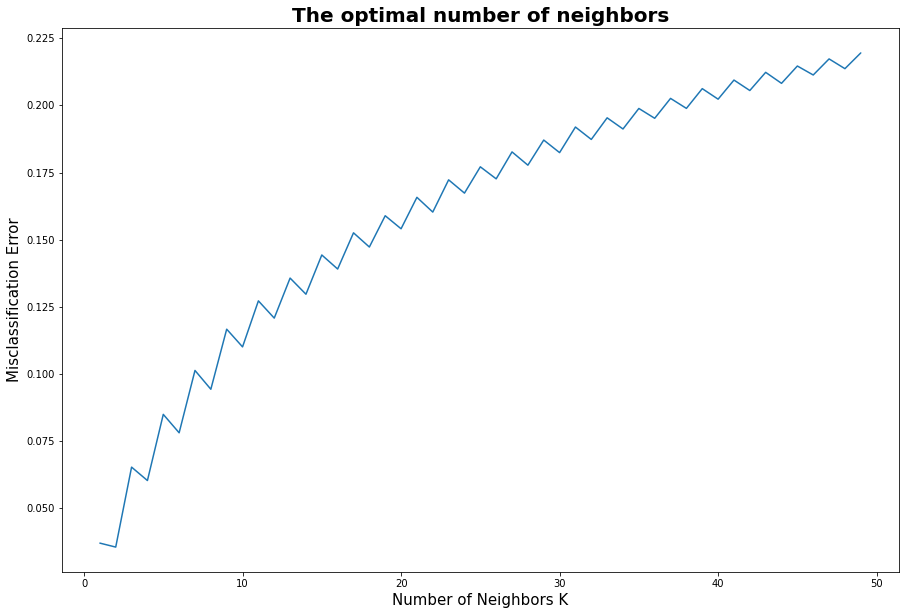

In [ ]:
from sklearn.model_selection import cross_val_score
k_list = list(range(1,50,1))
# creating list of cv scores
cv_scores = []

# perform 10-fold cross validation
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train_over, y_train_over, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())
# changing to misclassification error
MSE = [1 - x for x in cv_scores]

plt.figure()
plt.figure(figsize=(15,10))
plt.title('The optimal number of neighbors', fontsize=20, fontweight='bold')
plt.xlabel('Number of Neighbors K', fontsize=15)
plt.ylabel('Misclassification Error', fontsize=15)
sns.set_style("whitegrid")
plt.plot(k_list, MSE)

plt.show()

In [ ]:
best_k = k_list[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d." % best_k)

The optimal number of neighbors is 2.


### **Implementing KNN algorithm Uisng Sklearn-Package with optimal value of K-neighbor**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=2)
neigh.fit(X_train_over, y_train_over)
neigh.score(X_test_over, y_test_over)
y_pred = neigh.predict(X_test_over)
print('Accuracy', accuracy_score(y_test_over, y_pred))

Accuracy 0.9489502569910271


### **Confusion Matrix**

              precision    recall  f1-score   support

           0       0.96      0.93      0.95      5705
           1       0.93      0.97      0.95      5774

    accuracy                           0.95     11479
   macro avg       0.95      0.95      0.95     11479
weighted avg       0.95      0.95      0.95     11479

96.57083477658469
93.49429912810194
94.8950256991027


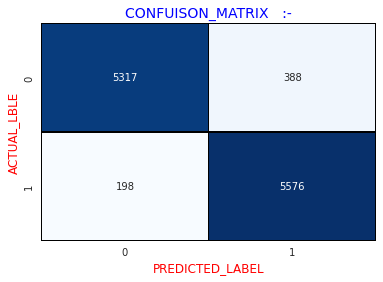

In [ ]:
pred_neigh=neigh.predict(X_test_over)
print(metrics.classification_report(y_test_over,pred_neigh))
print(metrics.precision_score(pred_neigh,y_test_over)*100)
print(metrics.recall_score(pred_neigh,y_test_over)*100)
print(metrics.accuracy_score(pred_neigh,y_test_over)*100)
sns.heatmap(metrics.confusion_matrix(y_test_over,pred_neigh),annot=True,cbar=False
            ,cmap="Blues",fmt="1",linecolor="Black",linewidth=0.3)
plt.xlabel("PREDICTED_LABEL",fontsize=12,color='r')
plt.ylabel("ACTUAL_LBLE",fontsize=12,color='r')
plt.title("CONFUISON_MATRIX   :-",fontsize=14,color="b")
plt.show()

### **USING UNDER-SAMPLING METHOD**

In [ ]:
data_undersampled=data.copy()

In [ ]:
#target class count bofer under_sampling
data_undersampled.TARGET.value_counts()

0    22957
1      404
Name: TARGET, dtype: int64

In [ ]:
#splitting the whole data set into to parts for under_sampling method-
data_majority_undersampled=data_undersampled[data_undersampled["TARGET"] == 0]
data_minority_undersampled=data_undersampled[data_undersampled["TARGET"] == 1]

In [ ]:
#here we will be keeing the majority class double the size of minority class to prevent the model from underfitting
data_under_sampled=resample(data_majority_undersampled,n_samples=844,replace=True,random_state=42)

In [ ]:
print(data_under_sampled.shape)

(844, 34)


In [ ]:
data_under=pd.concat([data_under_sampled,data_minority_undersampled])
data_under.head()

,BEGIN_MONTH,AGE,INCOME,YEARS_EMPLOYED,TARGET,HOUSE_TYPE_1,HOUSE_TYPE_2,HOUSE_TYPE_3,HOUSE_TYPE_4,HOUSE_TYPE_5,EDUCATION_TYPE_1,EDUCATION_TYPE_2,EDUCATION_TYPE_3,EDUCATION_TYPE_4,FAMILY SIZE_2,FAMILY SIZE_3,FAMILY SIZE_4,FAMILY SIZE_5,FAMILY SIZE_6,FAMILY SIZE_7,FAMILY SIZE_9,FAMILY SIZE_15,FAMILY SIZE_20,GENDER_1,WORK_PHONE_1,FAMILY_TYPE_1,FAMILY_TYPE_2,FAMILY_TYPE_3,FAMILY_TYPE_4,PHONE_1,INCOME_TYPE_1,INCOME_TYPE_2,INCOME_TYPE_3,INCOME_TYPE_4
17148,47,48,90000,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
946,34,51,450000,7,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1
5859,10,41,225000,8,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0
23404,52,48,225000,7,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
13051,4,53,90000,4,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [ ]:
#target column of sampled data
print(data_under.TARGET.value_counts())

0    844
1    404
Name: TARGET, dtype: int64


### **SPLITTING THE DATASET INTO TRAINING AND TESTING**

In [ ]:
X_under=data_under.drop("TARGET",axis=1)
y_under=data_under.TARGET
#spliting the data for train and test:
X_train_under,X_test_under,y_train_under,y_test_under=train_test_split(X_under,y_under,test_size=0.25,random_state=71)
#size of data after spliting
print("X_train_under : ",X_train_under.shape,"\ny_train_under : ",y_train_under.shape)
print("X_train_under : ",X_test_under.shape,"\ny_train_under : ",y_test_under.shape)

X_train_under :  (936, 33) 
y_train_under :  (936,)
X_train_under :  (312, 33) 
y_train_under :  (312,)


### **1.Decision Tree Algorithm**

In [ ]:
tree_under=DecisionTreeClassifier()
tree_under.fit(X_train_under,y_train_under)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
pred_under_tree=tree_under.predict(X_test_under)

In [ ]:
print(metrics.classification_report(pred_under_tree,y_test_under))

              precision    recall  f1-score   support

           0       0.77      0.71      0.74       222
           1       0.41      0.49      0.44        90

    accuracy                           0.65       312
   macro avg       0.59      0.60      0.59       312
weighted avg       0.67      0.65      0.66       312



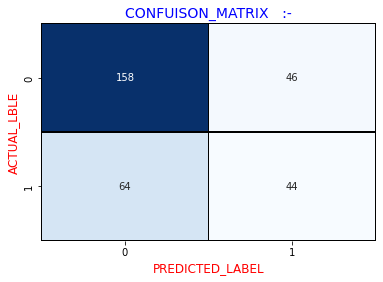

In [ ]:
sns.heatmap(metrics.confusion_matrix(y_test_under,pred_under_tree),annot=True,cbar=False
            ,cmap="Blues",fmt="1",linecolor="Black",linewidth=0.3)
plt.xlabel("PREDICTED_LABEL",fontsize=12,color='r')
plt.ylabel("ACTUAL_LBLE",fontsize=12,color='r')
plt.title("CONFUISON_MATRIX   :-",fontsize=14,color="b")
plt.show()

In [ ]:
score_under = {}
score_under["Decision_Tree"] ={}
print(metrics.precision_score(pred_under_tree,y_test_under)*100)
print(metrics.recall_score(pred_under_tree,y_test_under)*100)
print(metrics.accuracy_score(pred_under_tree,y_test_under)*100)

40.74074074074074
48.888888888888886
64.74358974358975


### **2.KNN Algorithm**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=2)
neigh.fit(X_train_under, y_train_under)
neigh.score(X_test_under, y_test_under)
y_pred = neigh.predict(X_test_under)
print('Accuracy', accuracy_score(y_test_under, y_pred))

Accuracy 0.6698717948717948


### **3.Native Bayes Classifier**

In [ ]:
# load the iris dataset
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train_under, y_train_under)

# making predictions on the testing set
y_pred = gnb.predict(X_test_under)

# comparing actual response values (y_test) with predicted response values (y_pred)
from sklearn import metrics
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test_under, y_pred)*100)

Gaussian Naive Bayes model accuracy(in %): 65.38461538461539


while comparing with undersampling and oversampling method based on the algorithm we can come to the conclusion that undersampling(SMOTE method) gives good accuracy than the other.



### **Comparision of Model using Boxplot**

KNN: 0.917061 (0.004917)
CART: 0.981937 (0.002392)
NB: 0.514244 (0.010163)
SVM: 0.641150 (0.012268)


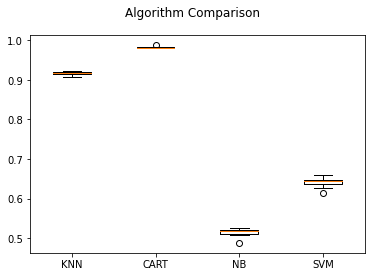

In [ ]:
# Compare Algorithms
import pandas
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, X_train_over, y_train_over, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()